In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
test = pd.read_csv('/Users/imac/Documents/Tijdelijk/Machine Learning/EindProject/ml-project/data/test.csv', 
                   delimiter=',')
train = pd.read_csv('/Users/imac/Documents/Tijdelijk/Machine Learning/EindProject/ml-project/data/train.csv', 
                    delimiter=',')

In [4]:
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           
    classes = list(le.classes_)                    
    test_ids = test.id                             
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)

In [5]:
sss = StratifiedShuffleSplit(test_size=0.2, random_state=23)
sss.get_n_splits(train.values, labels)

for train_index, test_index in sss.split(train.values, labels):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [6]:
# OUR VERSION
classifiers = [
    KNeighborsClassifier(n_neighbors=1, weights='uniform'),
    DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=1),
    AdaBoostClassifier(n_estimators=72, learning_rate=0.03)]

log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)  

KNeighborsClassifier
****Results****
Accuracy: 90.9091%
DecisionTreeClassifier
****Results****
Accuracy: 64.6465%
AdaBoostClassifier
****Results****
Accuracy: 51.5152%


In [7]:
# ORIGINAL VERSION
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),]

log_cols=["Classifier", "Accuracy"]
log_original = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log_original = log_original.append(log_entry)

KNeighborsClassifier
****Results****
Accuracy: 88.8889%
DecisionTreeClassifier
****Results****
Accuracy: 60.1010%
AdaBoostClassifier
****Results****
Accuracy: 4.5455%


In [8]:
%matplotlib inline

In [62]:
print(log)
print(log_original)

               Classifier   Accuracy
0    KNeighborsClassifier  90.909091
0  DecisionTreeClassifier  68.181818
0      AdaBoostClassifier  10.101010
               Classifier   Accuracy
0    KNeighborsClassifier  88.888889
0  DecisionTreeClassifier  63.636364
0      AdaBoostClassifier   4.545455


In [68]:
print(log)

               Classifier   Accuracy
0    KNeighborsClassifier  90.909091
0  DecisionTreeClassifier  64.646465
0      AdaBoostClassifier  23.737374


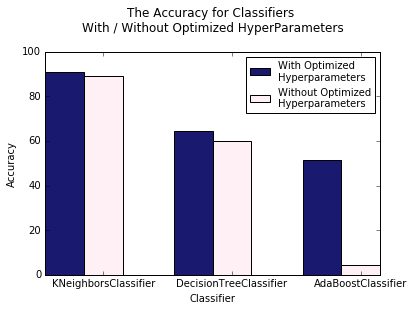

In [9]:
x = log['Classifier'].tolist()
y = log['Accuracy'].tolist()
x_original = log_original['Classifier'].tolist()
y_original = log_original['Accuracy'].tolist()

Number = [0.85, 1.85, 2.85]
NumberOriginal = [1.15, 2.15, 3.15]

ax = plt.subplot(111)
ax.bar(Number, y, width=0.3, color='midnightblue', align='center', label='With Optimized\nHyperparameters')
plt.xticks(Number, x)

ax.bar(NumberOriginal , y_original, width=0.3, color='lavenderblush', align='center', label='Without Optimized\nHyperparameters')
plt.xticks(NumberOriginal, x_original)

#Layout
ax.set_axis_bgcolor('white')
plt.legend(loc='best', prop={'size':10})

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for Classifiers \nWith / Without Optimized HyperParameters\n')

plt.show()